# Aufgabe 1: Fourier-Spektrum

Die zweidimensionale diskrete Fourier-Transformation $\mathcal{F}: \mathbb{R}^{W \times H} \rightarrow \mathbb{C}^{W \times H}$ überführt ein Bild in eine alternative Repräsentation, in der es als Überlagerung von Sinus- und Kosinusfunktionen unterschiedlicher Frequenz dargestellt wird:

$$
    \mathcal{F}(I)(u, v) = \sum_{x=0}^{W-1} \sum_{y=0}^{H-1} I(x, y) \cdot \exp\biggl(-2 \pi i \Bigl(\frac{ux}{W} + \frac{vy}{H}\Bigr)\biggr) \,.
$$

Zur kompakten Schreibweise der Sinus- und Kosinusfunktionen dient dabei die Eulersche Formel:

$$
    \exp(i \cdot \varphi) = \cos(\varphi) + i \cdot \sin(\varphi) \,.
$$

Das Ergebnis $\mathcal{F}(I)(u, v)$ ist eine Funktion über dem Raum der komplexen Zahlen, welche die Amplitude und Phase einer Welle mit horizontaler Frequenz $u$ und vertikaler Frequenz $v$ kodieren.
Der Betrag (auch *Magnitude*) dieser Fourier-Koeffizienten entspricht dabei der Amplitude der Welle und das Argument (Winkel zwischen den Koeffizienten) entspricht der Phase.

Verwenden Sie `numpy.fft.fft2` zur Berechnung der Fouriertransformation eines Bildes!
Danach befindet sich das Zentrum $\mathcal{F}(I)(0, 0)$ des Fourier-Spektrums in der linken oberen Ecke des transformierten Bildes.
Nutzen Sie daher `numpy.fft.fftshift`, um das Zentrum in den Bildmittelpunkt zu verschieben und stellen Sie sowohl Magnitude als auch Phase des Spektrums graphisch dar!
Da die Magnitude üblicherweise vom Koeffizienten $(0, 0)$ dominiert wird, sollte vor der Darstellung die Grauwerttransformation $x \mapsto \log(1+x)$ zur Kontrastverbesserung angewandt werden.

## 0. Pfade, Pakete etc.

In [152]:
import glob
import imageio
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [153]:
image_filter = 'Bilder/*.jpg'

## 1. Laden und Normalisieren des Bildes

In [154]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

In [155]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 2. Berechnung der Fouriertransformation
Berechnen Sie nun die Fouriertransformation von `image`, indem Sie die entsprechende Funktion aus `numpy.fft` verwenden. Achten Sie darauf, das Spektrum zu zentrieren!

In [156]:
image_transformed = np.fft.fft2(image)
image_transformed = np.fft.fftshift(image_transformed)

## 3. Darstellung

Stellen Sie nun das Originalbild sowie Magnitude und Phase des Fourier-Spektrums graphisch dar.

Denken Sie daran, vor der Darstellung des Fourier-Spektrums die Grauwerttransformation $x \mapsto \log(1+x)$ anzuwenden.

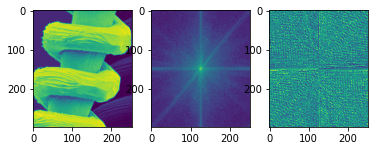

In [157]:
gray_transform = lambda x: np.log(1 + x)

image_transformed_magnitude = np.absolute(image_transformed)
image_transformed_magnitude = gray_transform(image_transformed_magnitude)
image_transformed_phase = np.angle(image_transformed)

plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(image_transformed_magnitude)
plt.subplot(133)
plt.imshow(image_transformed_phase)
plt.show()